## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10):
    input_layer = keras.layers.Input(input_shape)
    x=keras.layers.Dense(activation="relu",units=512)(input_layer)
    x=keras.layers.Dense(activation="relu",units=256)(x)
    x=keras.layers.Dense(activation="relu",units=128)(x)
    out=keras.layers.Dense(activation="softmax",units=output_units)(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])   
    return model

In [ ]:
momentum=[0.1,0.2,0.5,0.95]
nesterov=[True,False]
for m in momentum:
    keras.backend.clear_session()
    print("Experiment with MOMENTUM= %6f %s" %(m,n))
    model=build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    for n in nesterov:
        model.compile(optimizer=keras.optimizers.SGD(lr=lr,momentum=m,nesterov=n),metrics=["accuracy"],loss=["categorical_crossentropy"])
        model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),shuffle=True)
        train_loss=model.history.history["loss"]
        test_loss=model.history.history["val_loss"]
        train_accuracy=model.history.history["accuracy"]
        test_accuracy=model.history.history["val_accuracy"]
        exp_tag=

In [10]:
results = {}
MOMENTUM=[0.1,0.5,0.95,1]
nesterov=[True,False]
lr=0.0001
EPOCHS = 50
BATCH_SIZE = 256
for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    for n in nesterov:
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=n, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 


Experiment with MOMENTUM = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3824 - accuracy: 0.1222 - val_loss: 2.3382 - val_accuracy: 0.1237
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3166 - accuracy: 0.1251 - val_loss: 2.2990 - val_accuracy: 0.1384
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2880 - accuracy: 0.1457 - val_loss: 2.2779 - val_accuracy: 0.1589
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2706 - accuracy: 0.1577 - val_loss: 2.2636 - val_accuracy: 0.1693
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.2580 - accuracy: 0.1666 - val_loss: 2.2523 - val_accuracy: 0.1750
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2473 - accuracy: 0.1754 - val_loss: 2.2424 - val_accuracy: 0.1826
Epoch 7/50
50000/50000 [========

50000/50000 [==============================] - 3s 56us/step - loss: 1.9868 - accuracy: 0.3111 - val_loss: 1.9884 - val_accuracy: 0.3112
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9841 - accuracy: 0.3122 - val_loss: 1.9857 - val_accuracy: 0.3143
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9813 - accuracy: 0.3132 - val_loss: 1.9830 - val_accuracy: 0.3150
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9786 - accuracy: 0.3142 - val_loss: 1.9804 - val_accuracy: 0.3156
Epoch 9/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.9760 - accuracy: 0.3152 - val_loss: 1.9777 - val_accuracy: 0.3156
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9735 - accuracy: 0.3159 - val_loss: 1.9752 - val_accuracy: 0.3182
Epoch 11/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9709 - accuracy: 0.3172 - val_loss: 1.9727 - v

Epoch 10/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1716 - accuracy: 0.2355 - val_loss: 2.1636 - val_accuracy: 0.2461
Epoch 11/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1614 - accuracy: 0.2418 - val_loss: 2.1538 - val_accuracy: 0.2497
Epoch 12/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1519 - accuracy: 0.2469 - val_loss: 2.1444 - val_accuracy: 0.2535
Epoch 13/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1429 - accuracy: 0.2508 - val_loss: 2.1355 - val_accuracy: 0.2573
Epoch 14/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1342 - accuracy: 0.2556 - val_loss: 2.1269 - val_accuracy: 0.2616
Epoch 15/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1258 - accuracy: 0.2591 - val_loss: 2.1186 - val_accuracy: 0.2661
Epoch 16/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1177 - accuracy: 0.2633 - val_

50000/50000 [==============================] - 3s 58us/step - loss: 1.8948 - accuracy: 0.3396 - val_loss: 1.8934 - val_accuracy: 0.3439
Epoch 16/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8925 - accuracy: 0.3405 - val_loss: 1.8911 - val_accuracy: 0.3443
Epoch 17/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8902 - accuracy: 0.3418 - val_loss: 1.8889 - val_accuracy: 0.3455
Epoch 18/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8878 - accuracy: 0.3421 - val_loss: 1.8865 - val_accuracy: 0.3471
Epoch 19/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8855 - accuracy: 0.3427 - val_loss: 1.8844 - val_accuracy: 0.3470
Epoch 20/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8833 - accuracy: 0.3433 - val_loss: 1.8822 - val_accuracy: 0.3477
Epoch 21/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8810 - accuracy: 0.3448 - val_loss: 1.8803

Epoch 20/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7176 - accuracy: 0.4019 - val_loss: 1.7182 - val_accuracy: 0.4046
Epoch 21/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7100 - accuracy: 0.4024 - val_loss: 1.7099 - val_accuracy: 0.4029
Epoch 22/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7026 - accuracy: 0.4056 - val_loss: 1.7027 - val_accuracy: 0.4104
Epoch 23/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6963 - accuracy: 0.4088 - val_loss: 1.6953 - val_accuracy: 0.4135
Epoch 24/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6887 - accuracy: 0.4102 - val_loss: 1.6894 - val_accuracy: 0.4147
Epoch 25/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6813 - accuracy: 0.4127 - val_loss: 1.6827 - val_accuracy: 0.4151
Epoch 26/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6750 - accuracy: 0.4155 - val_

50000/50000 [==============================] - 3s 57us/step - loss: 1.4649 - accuracy: 0.4879 - val_loss: 1.4971 - val_accuracy: 0.4705
Epoch 26/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4619 - accuracy: 0.4906 - val_loss: 1.4962 - val_accuracy: 0.4705
Epoch 27/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4576 - accuracy: 0.4900 - val_loss: 1.4968 - val_accuracy: 0.4692
Epoch 28/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4540 - accuracy: 0.4927 - val_loss: 1.4908 - val_accuracy: 0.4725
Epoch 29/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4519 - accuracy: 0.4924 - val_loss: 1.4902 - val_accuracy: 0.4767
Epoch 30/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4512 - accuracy: 0.4932 - val_loss: 1.4881 - val_accuracy: 0.4766
Epoch 31/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4464 - accuracy: 0.4937 - val_loss: 1.4854

Epoch 30/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4112 - accuracy: 0.5057 - val_loss: 1.5168 - val_accuracy: 0.4766
Epoch 31/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4244 - accuracy: 0.4998 - val_loss: 1.5295 - val_accuracy: 0.4735
Epoch 32/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4109 - accuracy: 0.5056 - val_loss: 1.5437 - val_accuracy: 0.4685
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4066 - accuracy: 0.5067 - val_loss: 1.5093 - val_accuracy: 0.4740
Epoch 34/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4061 - accuracy: 0.5064 - val_loss: 1.5039 - val_accuracy: 0.4751
Epoch 35/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4170 - accuracy: 0.5039 - val_loss: 1.4980 - val_accuracy: 0.4752
Epoch 36/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4208 - accuracy: 0.5022 - val_

50000/50000 [==============================] - 3s 57us/step - loss: 1.4509 - accuracy: 0.4929 - val_loss: 1.6023 - val_accuracy: 0.4443
Epoch 36/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4615 - accuracy: 0.4896 - val_loss: 1.6046 - val_accuracy: 0.4444
Epoch 37/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4425 - accuracy: 0.4908 - val_loss: 1.6170 - val_accuracy: 0.4527
Epoch 38/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4469 - accuracy: 0.4887 - val_loss: 1.6378 - val_accuracy: 0.4470
Epoch 39/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4660 - accuracy: 0.4850 - val_loss: 1.6513 - val_accuracy: 0.4467
Epoch 40/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4498 - accuracy: 0.4921 - val_loss: 1.6153 - val_accuracy: 0.4446
Epoch 41/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4484 - accuracy: 0.4863 - val_loss: 1.6069

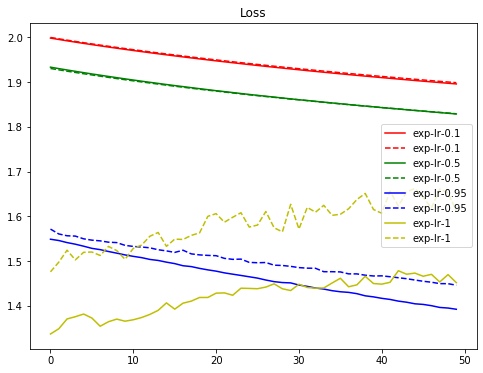

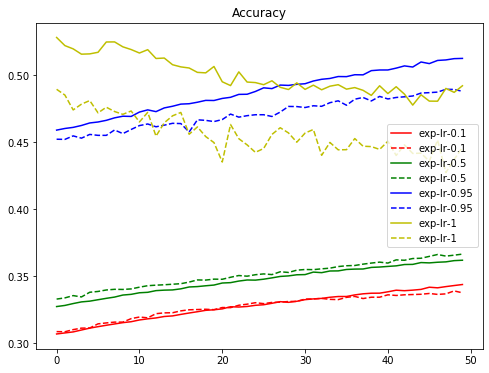

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","lime"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()